!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


# Библиотеки

In [1]:
import torch
import torchvision

from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, DataLoader, random_split

import os
import json
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

import struct
import sys
import random

from os import path
from array import array

from torchvision.transforms import v2

from torchvision import transforms 
from tqdm import tqdm

from matplotlib.ticker import AutoMinorLocator, MultipleLocator

from torch import nn

# Этапы обучения нейросети

1. Подготовка данных - преобразование данных, сплит данных
После спрлита данных тренировочные данные разбиваем на тренировочные и валидационные (на валидационной проверяем дейтвитель но нейросеть обучается)
2. Построение модели - структура модели, функция потерь, метод оптимизации градиентного спуска
3. Тренировка модели - тренировка и валидация модели

   Как проходит тренировка? Модель получает тренировочные данные и дает ответ, сравниваем их с реальными ответами подав в функцию потерь где происходит обратное **распространение ошибки** где увидим как сильно какие коэф-ты влияют на ошибку. ПОсле корректируем веса. После этого валидируем
   Как проходит валидация? Модель получает тренировочные данные и дает ответ, сравниваем их с реальными ответами подав в функцию потерь откуда выносится суждение об обучении модели
   Как проходит проверка обученности модели? Модель получает тренировочные данные и дает ответ, сравниваем их с реальными ответами подав в функцию потерь откуда выносится суждение об обучении модели

# Тензоры


In [2]:
torch.tensor([[2, 3], [4, 5]], dtype=torch.float32, requires_grad=True)# по идее перекладывает на графический процессор, device=torch.device('cuda:0')) # риквайрс - вычисление градиентов

tensor([[2., 3.],
        [4., 5.]], requires_grad=True)

In [3]:
tensor = torch.tensor([[2, 3], [4, 5]], dtype=torch.float32, requires_grad=True)# по идее перекладывает на графический процессор, device=torch.device('cuda:0')) # риквайрс - вычисление градиентов

tensor

tensor([[2., 3.],
        [4., 5.]], requires_grad=True)

## Методы и свойства тензоров

In [4]:
tensor.dtype, tensor.shape, tensor.size(), tensor.ndim, tensor[0, 0], tensor[0, 0].item()
# item - возвращает число как число а не тензор с градиентами
# ndim - количество осей

(torch.float32,
 torch.Size([2, 2]),
 torch.Size([2, 2]),
 2,
 tensor(2., grad_fn=<SelectBackward0>),
 2.0)

## Создание массивов разного размера

In [5]:
torch.zeros([2, 3, 4], dtype=torch.int32)

tensor([[[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]]], dtype=torch.int32)

In [6]:
tensor = torch.ones([2, 3, 4, 5], dtype=torch.int32)
tensor

tensor([[[[1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1]],

         [[1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1]],

         [[1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1]]],


        [[[1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1]],

         [[1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1]],

         [[1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1]]]], dtype=torch.int32)

In [7]:
torch.zeros_like(tensor)

tensor([[[[0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0]],

         [[0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0]],

         [[0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0]]],


        [[[0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0]],

         [[0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0]],

         [[0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0]]]], dtype=torch.int32)

In [8]:
torch.full_like(tensor, 9)

tensor([[[[9, 9, 9, 9, 9],
          [9, 9, 9, 9, 9],
          [9, 9, 9, 9, 9],
          [9, 9, 9, 9, 9]],

         [[9, 9, 9, 9, 9],
          [9, 9, 9, 9, 9],
          [9, 9, 9, 9, 9],
          [9, 9, 9, 9, 9]],

         [[9, 9, 9, 9, 9],
          [9, 9, 9, 9, 9],
          [9, 9, 9, 9, 9],
          [9, 9, 9, 9, 9]]],


        [[[9, 9, 9, 9, 9],
          [9, 9, 9, 9, 9],
          [9, 9, 9, 9, 9],
          [9, 9, 9, 9, 9]],

         [[9, 9, 9, 9, 9],
          [9, 9, 9, 9, 9],
          [9, 9, 9, 9, 9],
          [9, 9, 9, 9, 9]],

         [[9, 9, 9, 9, 9],
          [9, 9, 9, 9, 9],
          [9, 9, 9, 9, 9],
          [9, 9, 9, 9, 9]]]], dtype=torch.int32)

In [9]:
torch.arange(2, 10, 0.5)

tensor([2.0000, 2.5000, 3.0000, 3.5000, 4.0000, 4.5000, 5.0000, 5.5000, 6.0000,
        6.5000, 7.0000, 7.5000, 8.0000, 8.5000, 9.0000, 9.5000])

In [10]:
torch.diag(torch.tensor([5, 4]))

tensor([[5, 0],
        [0, 4]])

In [11]:
torch.eye(5)

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])

In [12]:
torch.tril(tensor)

tensor([[[[1, 0, 0, 0, 0],
          [1, 1, 0, 0, 0],
          [1, 1, 1, 0, 0],
          [1, 1, 1, 1, 0]],

         [[1, 0, 0, 0, 0],
          [1, 1, 0, 0, 0],
          [1, 1, 1, 0, 0],
          [1, 1, 1, 1, 0]],

         [[1, 0, 0, 0, 0],
          [1, 1, 0, 0, 0],
          [1, 1, 1, 0, 0],
          [1, 1, 1, 1, 0]]],


        [[[1, 0, 0, 0, 0],
          [1, 1, 0, 0, 0],
          [1, 1, 1, 0, 0],
          [1, 1, 1, 1, 0]],

         [[1, 0, 0, 0, 0],
          [1, 1, 0, 0, 0],
          [1, 1, 1, 0, 0],
          [1, 1, 1, 1, 0]],

         [[1, 0, 0, 0, 0],
          [1, 1, 0, 0, 0],
          [1, 1, 1, 0, 0],
          [1, 1, 1, 1, 0]]]], dtype=torch.int32)

## Изменение характеристик тензора

In [13]:
tensor.view([4, 5, 6]) # изменяем размер 

tensor([[[1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1]],

        [[1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1]],

        [[1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1]],

        [[1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1]]], dtype=torch.int32)

In [14]:
tensor.reshape([4, 5, 6])

tensor([[[1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1]],

        [[1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1]],

        [[1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1]],

        [[1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1]]], dtype=torch.int32)

In [15]:
torch.unsqueeze(tensor, 0).shape # Добавили нулевую ось

torch.Size([1, 2, 3, 4, 5])

## Математические операции над тезорами

In [16]:
tensor = torch.tensor([i for i in range(6)], dtype=torch.float32)

tensor + 5, tensor + tensor # складывать со списком нельзя

(tensor([ 5.,  6.,  7.,  8.,  9., 10.]),
 tensor([ 0.,  2.,  4.,  6.,  8., 10.]))

In [17]:
tensor.sum(), tensor.mean()

(tensor(15.), tensor(2.5000))

In [18]:
tensor = tensor.view([2, 3])
tensor_mean = tensor.mean(dim=1, keepdim=True) # среднее по первой оси
# keepdim - ось по которой считается среднее значение не удаляется
tensor_mean

tensor([[1.],
        [4.]])

## Вычисления на CPU и GPU

По умолчанию все тенсоры считаются на CPU

In [19]:
print(torch.cpu.is_available())
print(torch.cuda.is_available())

True
True


In [20]:
tensor = tensor.cpu() # переложили вычисление на cpu
tensor = tensor.to('cpu') # то же что и первое

# в обоих случаях можно заменить cpu на cuda
# при переводе места вычисления создается копия тенсора

In [21]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

tensor = tensor.to(device)

In [22]:
tensor.device # тензоры лежащие в разных устройствах сложить нельзя

device(type='cuda', index=0)

In [23]:
tensor.cpu().detach() # копирует тензор без градиентов

tensor([[0., 1., 2.],
        [3., 4., 5.]])

# Подготовка данных

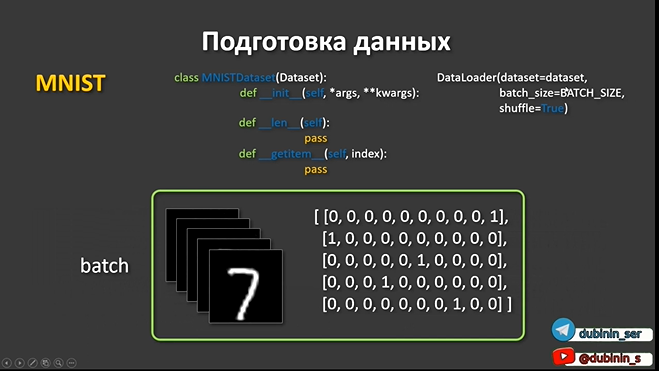
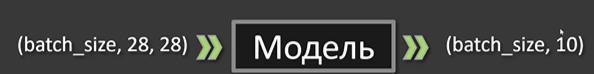
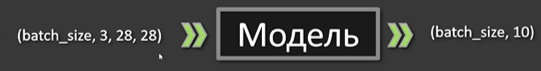

Ван хот вектор, батч, цветовой канал

## Подготовка данных

In [24]:
train_dataset = torchvision.datasets.MNIST(root='C:/Users/user/Юпитер/Данные для нейросетей/MNIST/content/sample_data', train=True, download=True)
test_dataset = torchvision.datasets.MNIST(root='C:/Users/user/Юпитер/Данные для нейросетей/MNIST/content/sample_data', train=False, download=True)

In [25]:
os.chdir('C:/Users/user/Юпитер/Данные для нейросетей')
os.getcwd()

'C:\\Users\\user\\Юпитер\\Данные для нейросетей'

In [26]:
# def read(dataset):
#     if dataset is 'training':
#         path_img = 'MNIST/content/sample_data/MNIST/raw/train-images-idx3-ubyte'
#         print(path_img)
#         path_lbl = 'MNIST/content/sample_data/MNIST/raw/train-labels-idx1-ubyte'
#         print(path_lbl)
#     elif dataset is 'testing':
#         path_img = 'MNIST/content/sample_data/MNIST/raw/t10k-images-idx3-ubyte'
#         path_lbl = 'MNIST/content/sample_data/MNIST/raw/t10k-labels-idx1-ubyte'
#     else:
#         raise ValueError("dataset must be 'testing' or 'training'")

#     with open(path_lbl, 'rb') as f_able:
#         _, size = struct.unpack('>II', f_able.read(8))
#         lbl = array('b', f_able.read())

#     with open(path_img, 'rb') as f_img:
#         _, size, rows, cols = struct.unpack('>IIII', f_img.read(16))
#         img = array('B', f_img.read())

#     return lbl, img, size, rows, cols


# def write_dataset(labels, data, size, rows, cols, output_dir):
    
#     classes = {i: f'class_{i}' for i in range(10)}

#     output_dirs = [
#         path.join(output_dir, classes[i])
#         for i in range(10)
#     ]

#     for dir in output_dirs:
#         if not path.exists(dir):
#             os.makedirs(dir)
    
#     #write data
#     for (i, label) in enumerate(labels):
#         output_filename = path.join(output_dirs[label], str(i) + '.jpg')
#         # print('writing ' + output_filename)

#         with open(output_filename, 'wb') as h:
#             data_i = [
#                 data[ (i*rows*cols + j*cols): (i*rows*cols + (1 + j)*cols)] 
#                 for j in range(rows)
#             ]
#             data_array = np.asarray(data_i)
       
#             im = Image.fromarray(data_array)
#             im.save(output_filename)

# output_path = 'MNIST/content/mnist'

# for dataset in ['training', 'testing']:
#     write_dataset(*read(dataset), path.join(output_path, dataset)) # ся не ебу как это работает

In [27]:
os.chdir('C:/Users/user/Юпитер/Данные для нейросетей')

In [28]:
# if not os.path.isdir('dataset'):
#     os.mkdir('dataset')

# img = np.random.randint(0, 50, [100000, 64, 64], dtype=np.uint8)
# square = np.random.randint(100, 200, [100000, 15, 15], dtype=np.uint8)

# coords = np.empty([100000, 2])

# data = {}

# for i in range(img.shape[0]):
#     x = np.random.randint(20, 44)
#     y = np.random.randint(20, 44)

#     img[i, (y - 7):(y + 8), (x - 7):(x + 8)] = square[i]

#     coords[i] = [y, x]

#     name_img = f'img{i}.jpeg'
#     path_img = os.path.join('dataset/', name_img)

#     image = Image.fromarray(img[i])
#     image.save(path_img)

#     data[name_img] = [y, x]

# with open('dataset/coords.json', 'w') as f:
#     json.dump(data, f, indent=2)

In [29]:
# coords[1, 0], coords[1, 1]

In [30]:
# plt.imshow(img[1], cmap='gray')
# plt.scatter(coords[1 ,1], coords[1, 0])

## Написание класса для датасета

class Name(daset):
def __init__(self, path, transform=None):

def __len__(self):

def __getitem__(self, index):

Писать можно что угодно, но результат должени быть один

len - возвращает длину датасета

getitem - элемент датасета с ответом к ниму

In [31]:
path = r'C:\Users\user\Юпитер\Данные для нейросетей\MNIST\content\mnist\training'

for path_dir, dir_list, file_list in os.walk(path):
    print('Путь к открытой папке ' + path_dir)
    print('    ... число папок ' + str(len(dir_list)))
    print('    ... число файлов ' + str(len(file_list)))

Путь к открытой папке C:\Users\user\Юпитер\Данные для нейросетей\MNIST\content\mnist\training
    ... число папок 10
    ... число файлов 0
Путь к открытой папке C:\Users\user\Юпитер\Данные для нейросетей\MNIST\content\mnist\training\class_0
    ... число папок 0
    ... число файлов 5923
Путь к открытой папке C:\Users\user\Юпитер\Данные для нейросетей\MNIST\content\mnist\training\class_1
    ... число папок 0
    ... число файлов 6742
Путь к открытой папке C:\Users\user\Юпитер\Данные для нейросетей\MNIST\content\mnist\training\class_2
    ... число папок 0
    ... число файлов 5958
Путь к открытой папке C:\Users\user\Юпитер\Данные для нейросетей\MNIST\content\mnist\training\class_3
    ... число папок 0
    ... число файлов 6131
Путь к открытой папке C:\Users\user\Юпитер\Данные для нейросетей\MNIST\content\mnist\training\class_4
    ... число папок 0
    ... число файлов 5842
Путь к открытой папке C:\Users\user\Юпитер\Данные для нейросетей\MNIST\content\mnist\training\class_5
    ... 

In [32]:
class MNISTDataset(Dataset): # собственный класс для датасета
    def __init__(self, path, transform=None):
        self.path = path
        self.transform = transform
        self.len_dataset = 0
        self.data_list = []
        
        for path_dir, dir_list, file_list in os.walk(path):
            if path_dir == path:
                self.classes = dir_list
                self.class_to_idx = {cls_name: i for i, cls_name in enumerate(self.classes)}
                continue
            cls = path_dir.split('\\')[-1]
            for name_file in file_list:
                file_path = os.path.join(path_dir, name_file)
                self.data_list.append((file_path, self.class_to_idx[cls]))
            self.len_dataset += len(file_list)
    
    def __len__(self):
        return self.len_dataset
    
    def __getitem__(self, index):
        file_path, target = self.data_list[index]
        sample = Image.open(file_path)
        if self.transform is not None:
            sample = self.transform(sample)
        return sample, target

In [33]:
train_data = MNISTDataset(r'C:\Users\user\Юпитер\Данные для нейросетей\MNIST\content\mnist\training')
test_data = MNISTDataset(r'C:\Users\user\Юпитер\Данные для нейросетей\MNIST\content\mnist\testing')

In [34]:
# train_data.classes, len(train_data), len(test_data), train_data[3452]

In [35]:
for cls, one_hot_position in train_data.class_to_idx.items():
    one_hot_vector = [(i == one_hot_position) * 1 for i in range(10)]
    print(f'\033[32m{cls}\033[0m => \033[34m{one_hot_vector}\033[0m')

class_0 => [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
class_1 => [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
class_2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
class_3 => [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
class_4 => [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
class_5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
class_6 => [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
class_7 => [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
class_8 => [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
class_9 => [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


Класс- class_9


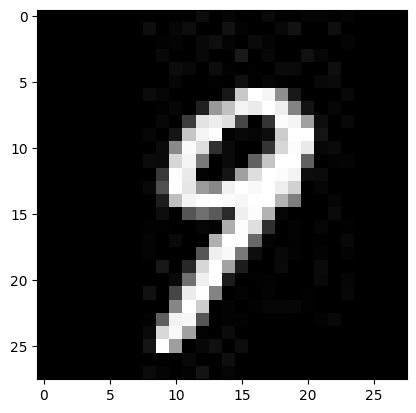

In [36]:
img, one_hot_position= train_data[random.randint(0, len(train_data))]

cls = train_data.classes[one_hot_position]
print(f'Класс- {cls}')
plt.imshow(img, cmap='gray')

In [37]:
train_data, val_data = random_split(train_data, [0.8, 0.2]) # рабивка данных на тренировочный и валидационный датасет

In [38]:
print(f'Длинна тренировочных данных - {len(train_data)}')
print(f'Длинна валидационныз данных - {len(val_data)}')
print(f'Длинна тестовых данных - {len(test_data)}')

Длинна тренировочных данных - 48000
Длинна валидационныз данных - 12000
Длинна тестовых данных - 10000


In [39]:
train_loader = DataLoader(train_data, batch_size=16, shuffle=True) # лоадеры данных
val_loader = DataLoader(val_data, batch_size=16, shuffle=False)
test_loader = DataLoader(test_data, batch_size=16, shuffle=False)

In [40]:
# for i, (sample, target) in enumerate(train_loader):
#     if i == 3:
#         print(i, sample, target)
#     if i < 3:
#         print(f'Номер batch = {i + 1}')
#         print(f'    размер samples = {sample.shape}')
#         print(f'    размер target = {target.shape}')

# print()
# print()
# print(f'Номер batch = {i + 1}')
# print(f'    размер samples = {sample.shape}')
# print(f'    размер target = {target.shape}')

## ImageFolder Использование готового класса для датасета

In [41]:
train_data = ImageFolder(root = r'C:\Users\user\Юпитер\Данные для нейросетей\MNIST\content\mnist\training')
test_data = ImageFolder(root = r'C:\Users\user\Юпитер\Данные для нейросетей\MNIST\content\mnist\testing')
# можно передавать трансформации
# однако должна быть определенная структура хранения - как есть в данном случае

In [42]:
train_data.classes

['class_0',
 'class_1',
 'class_2',
 'class_3',
 'class_4',
 'class_5',
 'class_6',
 'class_7',
 'class_8',
 'class_9']

In [43]:
train_data.class_to_idx

{'class_0': 0,
 'class_1': 1,
 'class_2': 2,
 'class_3': 3,
 'class_4': 4,
 'class_5': 5,
 'class_6': 6,
 'class_7': 7,
 'class_8': 8,
 'class_9': 9}

In [44]:
train_data[2342]

(<PIL.Image.Image image mode=RGB size=28x28>, 0)

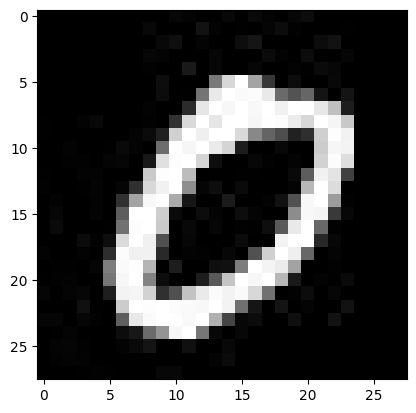

In [45]:
plt.imshow(train_data[2342][0])

In [46]:
train_data, val_data = random_split(train_data, [0.8, 0.2]) # разбили данные на тренировочные и валидационные


In [47]:
train_loader = DataLoader(dataset=train_data, batch_size=64, shuffle=True) #бахнули батчей
val_loader = DataLoader(dataset=val_data, batch_size=64, shuffle=False)
test_loader = DataLoader(dataset=test_data, batch_size=64, shuffle=False)

## Данные для задачи регрессии

In [48]:
class DatasetReg(Dataset): # собственный класс для датасета
    def __init__(self, path, transform=None):
        self.path = path
        self.transform = transform
        
        self.list_name_file = os.listdir(path)
        if 'coords.json' in self.list_name_file:
            self.list_name_file.remove('coords.json')

        self.len_dataset = len(self.list_name_file)

        with open(os.path.join(self.path, 'coords.json'), 'r') as f:
            self.dict_coords = json.load(f)
    
    def __len__(self):
        return self.len_dataset
    
    def __getitem__(self, index):
        name_file = self.list_name_file[index]
        path_to_img = os.path.join(self.path, name_file)

        img = Image.open(path_to_img)
        coord = self.dict_coords[name_file]

        if self.transform is not None:
            img = self.transform(img)
            coord = torch.tensor(coord, dtype=torch.float32)
            
        return np.array(img), coord

In [49]:
datasetreg = DatasetReg(r'C:\Users\user\Юпитер\Данные для нейросетей\center\dataset')

In [50]:
len(datasetreg)

100000

In [51]:
datasetreg[2343]

(array([[ 9, 21, 45, ..., 23, 37, 33],
        [63, 15, 27, ..., 24, 29,  2],
        [33,  0, 28, ..., 38, 43, 19],
        ...,
        [24, 55, 10, ..., 53, 21, 56],
        [ 5, 35, 18, ..., 55,  9,  6],
        [24, 34,  5, ..., 27, 25, 42]], dtype=uint8),
 [25, 23])

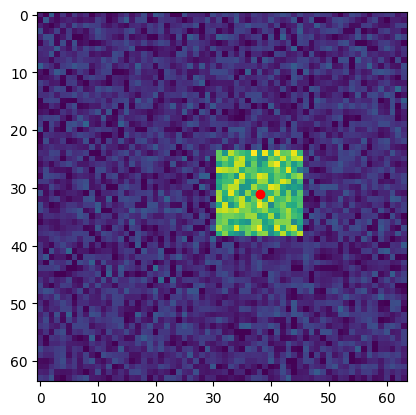

In [52]:
dat = datasetreg[random.randint(0, 100000)]
plt.imshow(dat[0])
plt.scatter(dat[1][1], dat[1][0], marker='o', color='red')

In [53]:
train_set, val_set, test_set = random_split(datasetreg, [0.7, 0.1, 0.2])

In [54]:
train_loader_reg = DataLoader(dataset=train_set, batch_size=64, shuffle=True) #бахнули батчей
val_loader_reg = DataLoader(dataset=val_set, batch_size=64, shuffle=False)
test_loader_reg = DataLoader(dataset=test_set, batch_size=64, shuffle=False)

# Трансформация данных

In [55]:
os.getcwd()

'C:\\Users\\user\\Юпитер\\Данные для нейросетей'

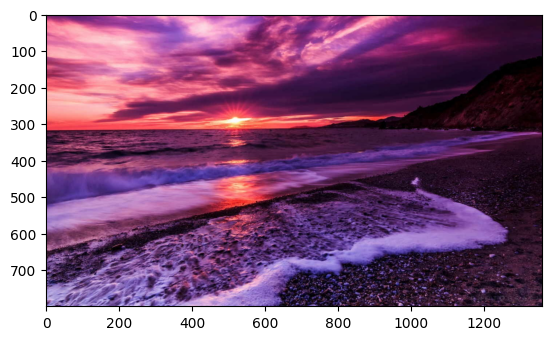

In [56]:
img = Image.open('Картинка.jpg')
plt.imshow(img)

In [57]:
img = np.array(img)
print(img.shape)
print(img.dtype)
print(img.min())
print(img.max())

(800, 1360, 3)
uint8
0
255


## Перевод в тензор

Все данные перед тем как передать в нейронку нужно преобразовать в тензор

In [58]:
transform = transforms.ToTensor()
img_ToTensor = transform(img)
print(img_ToTensor.shape) # цветовые какналы перемещены на первую ось
print(img_ToTensor.dtype)
print(img_ToTensor.min())
print(img_ToTensor.max())

torch.Size([3, 800, 1360])
torch.float32
tensor(0.)
tensor(1.)


Методом reshape переместить цветовые каналы на нулевую ось не получится. См прикол

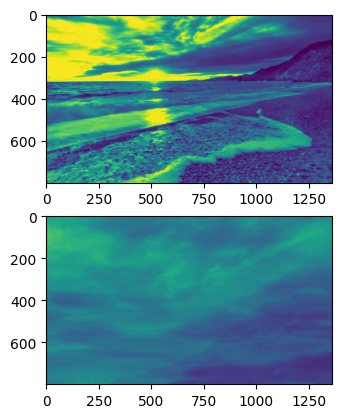

In [59]:
imgc2 = img
imgc0 = img.reshape([3, 800, 1360])

_, ax = plt.subplots(2, 1)
ax[0].imshow(imgc2[..., 0])
ax[1].imshow(imgc0[0, ...])

## Нормализация данных

In [60]:
transform = transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))

img_norm = transform(img_ToTensor)

## Последовательное применение трансформаций

In [61]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))    
])
img = transform(Image.open('Картинка.jpg'))

print(img_ToTensor.shape) # цветовые какналы перемещены на первую ось
print(img_ToTensor.dtype)
print(img_ToTensor.min())
print(img_ToTensor.max())

                

torch.Size([3, 800, 1360])
torch.float32
tensor(0.)
tensor(1.)


## v2

ToTensor - аналогично

In [62]:
transform = v2.ToImage() # то же что и ToTensor
# чтобы нормировать - v2.ToDtype(torch.float32, scale=True). Лучше нормировать (в данном случае от 0 до 1)
# нормировка как и прошлая
img = transform(Image.open('Картинка.jpg'))


print(img_ToTensor.shape) # цветовые какналы перемещены на первую ось
print(img_ToTensor.dtype)
print(img_ToTensor.min())
print(img_ToTensor.max())

torch.Size([3, 800, 1360])
torch.float32
tensor(0.)
tensor(1.)


In [63]:
transform = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))    
])
img = transform(Image.open('Картинка.jpg'))

print(img.shape) # цветовые какналы перемещены на первую ось
print(img.dtype)
print(img.min())
print(img.max())

# изображения можно переразмеривать, обрезать, поворачивать

torch.Size([3, 800, 1360])
torch.float32
tensor(-1.)
tensor(1.)


Для оптимизации скорости преобразований нужно передерживаться

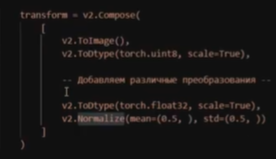

## Трансформация MNIST

In [64]:
transform = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=(0.5,), std=(0.5,))
])

In [65]:
os.getcwd()

'C:\\Users\\user\\Юпитер\\Данные для нейросетей'

In [66]:
train_data = MNISTDataset(r'C:\Users\user\Юпитер\Данные для нейросетей\MNIST\content\mnist\training', transform=transform)
test_data = MNISTDataset(r'C:\Users\user\Юпитер\Данные для нейросетей\MNIST\content\mnist\testing', transform=transform)

In [67]:
img, cls = train_data[234]

print('img')
print(type(img))
print(img.shape)
print(img.dtype)
print(img.min())
print(img.max())
print('cls')
print(cls)

img
<class 'torchvision.tv_tensors._image.Image'>
torch.Size([1, 28, 28])
torch.float32
tensor(-1.)
tensor(1.)
cls
0


In [68]:
train_data, val_data = random_split(train_data, [0.8, 0.2])

In [69]:
train_loader = DataLoader(dataset=train_data, batch_size=16, shuffle=True)
val_loader = DataLoader(dataset=val_data, batch_size=16, shuffle=False)
test_loader = DataLoader(dataset=test_data, batch_size=16, shuffle=False)

In [70]:
img, cls = next(iter(train_loader))
print('img')
print(type(img))
print(img.shape)
print(img.dtype)
print(img.min())
print(img.max())
print('cls')
print(cls)

img
<class 'torch.Tensor'>
torch.Size([16, 1, 28, 28])
torch.float32
tensor(-1.)
tensor(1.)
cls
tensor([7, 1, 5, 5, 7, 8, 0, 4, 2, 4, 6, 9, 5, 3, 1, 6])


## Трансформация данных для регрессии

In [71]:
datasetreg = DatasetReg(r'C:\Users\user\Юпитер\Данные для нейросетей\center\dataset', transform=transform)

In [72]:
train_data_reg, val_data_reg, test_data_reg = random_split(datasetreg, [0.7, 0.1, 0.2])

In [73]:
train_loader_reg = DataLoader(dataset=train_data_reg, batch_size=16, shuffle=True)
val_loader_reg = DataLoader(dataset=val_data_reg, batch_size=16, shuffle=False)
test_loader_reg = DataLoader(dataset=test_data_reg, batch_size=16, shuffle=False)

In [74]:
img, coord = next(iter(train_loader_reg))
print('img')
print(type(img))
print(img.shape)
print(img.dtype)
print(img.min())
print(img.max())
print('coord')
print(cls)

img
<class 'torch.Tensor'>
torch.Size([16, 1, 64, 64])
torch.float32
tensor(-1.)
tensor(0.7725)
coord
tensor([7, 1, 5, 5, 7, 8, 0, 4, 2, 4, 6, 9, 5, 3, 1, 6])


## Написание собственных трансформаций

In [75]:
class MyTransform(torch.nn.Module):

    def forward(self, sample):
        pass

In [76]:
class MyNormalize(torch.nn.Module): # или можем убрать наследование
    def __init__(self, mean, std):
        super().__init__() # и убираем
        self.mean = mean
        self.std = std
        
    def forward(self, sample): # и здесь пишем __call__
        sample = (sample - self.mean) / self.std
        return sample

# Построение модели

Функция активации - нелинейный переход между слоями нейронной сети - ReLU, sigmoid, tanh, softmax

функция потерь

метрика - все из torch.nn

оптимизатор градиентного спуска - torch.optim

Гиперпараметры - параметры определяемые до начала обучения - число слоев, нейронов, ф активации, число эпох, пропорции разделения данных, ксорость обучения, размер батча

## Создание нейросети

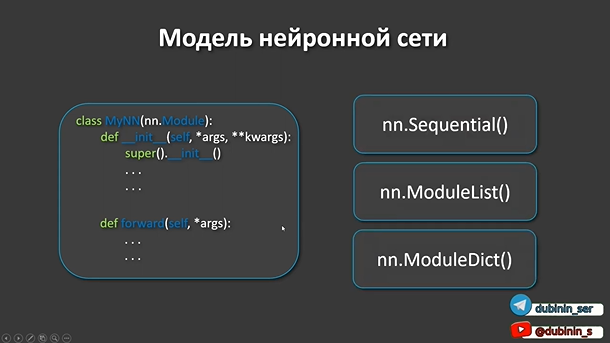

sequention - простейший способ создать нейронку

В него передаем слои нейронной сети

In [78]:
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128,10)
)

In [79]:
model = nn.Sequential()
model.add_module('layer1', nn.Linear(784, 128))
model.add_module('relu', nn.ReLU())
model.add_module('layer2', nn.Linear(128, 10))

model, model.layer1

(Sequential(
   (layer1): Linear(in_features=784, out_features=128, bias=True)
   (relu): ReLU()
   (layer2): Linear(in_features=128, out_features=10, bias=True)
 ),
 Linear(in_features=784, out_features=128, bias=True))

In [80]:
class MyNN(nn.Module):
    def __init__(self, input, output):
        super().__init__()
        self.layer1 = nn.Linear(input, 128)
        self.act = nn.ReLU()
        self.layer2 = nn.Linear(128, output)

    def forward(self, x):
        x = self.layer1(x)
        x = self.act(x)
        out = self.layer2(x)
        return out

model = MyNN(784, 2)
input = torch.rand([16, 784], dtype=torch.float32)

out = model(input)
model, out.shape

(MyNN(
   (layer1): Linear(in_features=784, out_features=128, bias=True)
   (act): ReLU()
   (layer2): Linear(in_features=128, out_features=2, bias=True)
 ),
 torch.Size([16, 2]))

In [81]:
class MyNN(nn.Module):
    def __init__(self, input, output):
        super().__init__()
        self.layer1 = nn.Linear(input, 128)
        self.act = nn.ReLU()
        self.layer2 = nn.Linear(128, output)

    def forward(self, x):
        x = self.layer1(x)
        x = self.act(x)
        out = self.layer2(x)
        return out

model = MyNN(784, 2)
input = torch.rand([16, 784], dtype=torch.float32)

out = model(input)
model, out.shape

(MyNN(
   (layer1): Linear(in_features=784, out_features=128, bias=True)
   (act): ReLU()
   (layer2): Linear(in_features=128, out_features=2, bias=True)
 ),
 torch.Size([16, 2]))

In [82]:
# модель с двумя входами и выходами

class MyNN(nn.Module):
    def __init__(self, input, output):
        super().__init__()
        self.layer1 = nn.Linear(input, 128)
        self.act = nn.ReLU()
        self.layer2 = nn.Linear(128, output)

    def forward(self, x, y):
        x = self.layer1(x)
        x = self.act(x + y)
        out = self.layer2(x)
        return out, x

model = MyNN(784, 2)
input = torch.rand([16, 784], dtype=torch.float32)
input2 = torch.rand([16, 128], dtype=torch.float32)

out, x = model(input, input2)
model, out.shape, x.shape

(MyNN(
   (layer1): Linear(in_features=784, out_features=128, bias=True)
   (act): ReLU()
   (layer2): Linear(in_features=128, out_features=2, bias=True)
 ),
 torch.Size([16, 2]),
 torch.Size([16, 128]))

        # но лучше не так
        # layers =[]
        # for i in range(10):
        #     layers.append(nn.Linear(input, hidden_size))
        #     layers.append(nn.Relu())
        #     input = hidden_size
        #     hidden_size /= 2 # ай ай, тут должен быть инт. Но об этом позжу
        # layers.append(nn.Linear(input, output))
        # self.model = nn.ModuleList(layers) # теперь слои зарегестрированны
        # # self.model = nn.Sequestion(layers) # теперь слои зарегестрированны


In [83]:
class MyNN(nn.Module):
    def __init__(self, input, output, hidden_size=2048, choice='relu'):
        super().__init__()
        # self.activations = nn.ModuleDict({
        #                                 'lrelu': nn.LeakyReLU(),
        #                                 'relu': nn.ReLU()
        #                                 })
        self.layers = nn.ModuleList()
        for i in range(10):
            self.layers.add_module(f'layer{i}', nn.Linear(input, hidden_size))
            self.layers.add_module(f'act_{i}', nn.ReLU()) #self.activations[choice])
            input = hidden_size
            hidden_size = int(hidden_size / 2)
        self.layers.add_module(f'layer_out', nn.Linear(input, output))
        
    
    def forward(self, x):
        # out = self.model(x)
        output = []
        for i, layer in enumerate(self.layers):
            x = layer(x)
            if i != 0 and i%2 == 0 and i%4 != 0:
                output.append(x)
        output.append(x)
        return output


model = MyNN(784, 2)
input = torch.rand([16, 784], dtype=torch.float32)

out = model(input)
model, out

(MyNN(
   (layers): ModuleList(
     (0): Linear(in_features=784, out_features=2048, bias=True)
     (1): ReLU()
     (2): Linear(in_features=2048, out_features=1024, bias=True)
     (3): ReLU()
     (4): Linear(in_features=1024, out_features=512, bias=True)
     (5): ReLU()
     (6): Linear(in_features=512, out_features=256, bias=True)
     (7): ReLU()
     (8): Linear(in_features=256, out_features=128, bias=True)
     (9): ReLU()
     (10): Linear(in_features=128, out_features=64, bias=True)
     (11): ReLU()
     (12): Linear(in_features=64, out_features=32, bias=True)
     (13): ReLU()
     (14): Linear(in_features=32, out_features=16, bias=True)
     (15): ReLU()
     (16): Linear(in_features=16, out_features=8, bias=True)
     (17): ReLU()
     (18): Linear(in_features=8, out_features=4, bias=True)
     (19): ReLU()
     (20): Linear(in_features=4, out_features=2, bias=True)
   )
 ),
 [tensor([[-0.1145, -0.0677,  0.0937,  ...,  0.0410, -0.1323, -0.2329],
          [-0.0882, -0.13

In [84]:
class MyNN(nn.Module):
    def __init__(self, input, output, hidden_size=2048, choice='relu'):
        super().__init__()
        self.activations = nn.ModuleDict({
                                        'lrelu': nn.LeakyReLU(),
                                        'relu': nn.ReLU()
                                        })
        self.layers = nn.ModuleList()
        for i in range(10):
            self.layers.add_module(f'layer{i}', nn.Linear(input, hidden_size))
            self.layers.add_module(f'act_{i}', self.activations[choice])
            input = hidden_size
            hidden_size = int(hidden_size / 2)
        self.layers.add_module(f'layer_out', nn.Linear(input, output))
        
    
    def forward(self, x):
        # out = self.model(x)
        output = []
        for i, layer in enumerate(self.layers):
            x = layer(x)
            if i != 0 and i%2 == 0 and i%4 != 0:
                output.append(x)
        output.append(x)
        return output


model = MyNN(784, 2)
input = torch.rand([16, 784], dtype=torch.float32)

out = model(input)
model, out

(MyNN(
   (activations): ModuleDict(
     (lrelu): LeakyReLU(negative_slope=0.01)
     (relu): ReLU()
   )
   (layers): ModuleList(
     (0): Linear(in_features=784, out_features=2048, bias=True)
     (1): ReLU()
     (2): Linear(in_features=2048, out_features=1024, bias=True)
     (3): ReLU()
     (4): Linear(in_features=1024, out_features=512, bias=True)
     (5): ReLU()
     (6): Linear(in_features=512, out_features=256, bias=True)
     (7): ReLU()
     (8): Linear(in_features=256, out_features=128, bias=True)
     (9): ReLU()
     (10): Linear(in_features=128, out_features=64, bias=True)
     (11): ReLU()
     (12): Linear(in_features=64, out_features=32, bias=True)
     (13): ReLU()
     (14): Linear(in_features=32, out_features=16, bias=True)
     (15): ReLU()
     (16): Linear(in_features=16, out_features=8, bias=True)
     (17): ReLU()
     (18): Linear(in_features=8, out_features=4, bias=True)
     (19): ReLU()
     (20): Linear(in_features=4, out_features=2, bias=True)
   )
 

## Некоторые методы

state_dict

parameter

train - перед началом тестирования

eval - перед валидацией

In [85]:
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128,10)
)
model

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [86]:
input = torch.rand([16, 784], dtype=torch.float32)

out = model(input)
out.shape


torch.Size([16, 10])

In [87]:
model.state_dict() # возвращает ссылку на состояние модели

OrderedDict([('0.weight',
              tensor([[ 0.0201, -0.0049, -0.0181,  ..., -0.0056, -0.0013,  0.0203],
                      [ 0.0091, -0.0049,  0.0264,  ...,  0.0004, -0.0188, -0.0111],
                      [-0.0325, -0.0066, -0.0218,  ..., -0.0104,  0.0308, -0.0275],
                      ...,
                      [ 0.0201, -0.0125,  0.0314,  ...,  0.0171, -0.0007, -0.0286],
                      [-0.0184,  0.0321,  0.0188,  ...,  0.0018, -0.0329, -0.0249],
                      [ 0.0284, -0.0233,  0.0168,  ..., -0.0104,  0.0015, -0.0041]])),
             ('0.bias',
              tensor([ 0.0039, -0.0247, -0.0138, -0.0053, -0.0110, -0.0127,  0.0145, -0.0040,
                       0.0060,  0.0106, -0.0298, -0.0180,  0.0014,  0.0040, -0.0282,  0.0305,
                       0.0261,  0.0328,  0.0173, -0.0276, -0.0262,  0.0247, -0.0308,  0.0352,
                       0.0234, -0.0115, -0.0236,  0.0235, -0.0091, -0.0005, -0.0273, -0.0067,
                       0.0237, -0.0018, 

In [88]:
for parameter in model.parameters():
    print(parameter)
    print(parameter.shape)
    print()

Parameter containing:
tensor([[ 0.0201, -0.0049, -0.0181,  ..., -0.0056, -0.0013,  0.0203],
        [ 0.0091, -0.0049,  0.0264,  ...,  0.0004, -0.0188, -0.0111],
        [-0.0325, -0.0066, -0.0218,  ..., -0.0104,  0.0308, -0.0275],
        ...,
        [ 0.0201, -0.0125,  0.0314,  ...,  0.0171, -0.0007, -0.0286],
        [-0.0184,  0.0321,  0.0188,  ...,  0.0018, -0.0329, -0.0249],
        [ 0.0284, -0.0233,  0.0168,  ..., -0.0104,  0.0015, -0.0041]],
       requires_grad=True)
torch.Size([128, 784])

Parameter containing:
tensor([ 0.0039, -0.0247, -0.0138, -0.0053, -0.0110, -0.0127,  0.0145, -0.0040,
         0.0060,  0.0106, -0.0298, -0.0180,  0.0014,  0.0040, -0.0282,  0.0305,
         0.0261,  0.0328,  0.0173, -0.0276, -0.0262,  0.0247, -0.0308,  0.0352,
         0.0234, -0.0115, -0.0236,  0.0235, -0.0091, -0.0005, -0.0273, -0.0067,
         0.0237, -0.0018, -0.0024, -0.0151,  0.0222,  0.0204, -0.0281, -0.0193,
         0.0322,  0.0250,  0.0084, -0.0031,  0.0147,  0.0076, -0.0258, 

## Модель для классификации MNIST

In [89]:
class MyNN(nn.Module):
    def __init__(self, input, output):
        super().__init__()
        self.layer1 = nn.Linear(input, 128)
        self.act = nn.ReLU()
        self.layer2 = nn.Linear(128, output)

    def forward(self, x):
        x = self.layer1(x)
        x = self.act(x)
        out = self.layer2(x)
        return out



## Модель для регрессии

цикл обучения

    тренировка модели
    
        данные
        
        прямой проход + расчёт ошибки модели - значение функции потерь
        
        обратный проход - расчёт градиента обучаемых параметров
        
        шаг оптимизации - градиентным спуском настраиваем веса (подстраиваем модель под входные данные)
        
    расчёт значения метрики
    
    сохранение значения функции потерь и метрики

    валидация
    
        данные

        прямой роход + расчёт ошибки модели

    расчёт значения метрики

    сохранение значения функции потерь и метрики

In [90]:
model_classification = MyNN(784, 2)

In [91]:
# определение функции потерь и оптимизатора градиентного спуска
loss_classififcation = nn.CrossEntropyLoss()
opt_classification = torch.optim.Adam(model_classification.parameters(), lr=0.001) # lr - скорость обучения

In [92]:
model_regression = MyNN(64 * 64, 2)

In [93]:
# определение функции потерь и оптимизатора градиентного спуска
loss_classififcation = nn.MSELoss()
opt_classification = torch.optim.Adam(model_regression.parameters(), lr=0.001) # lr - скорость обучения

# Обучение нейросети

## Распознование

In [94]:
class MyNN(nn.Module):
    def __init__(self, input, output):
        super().__init__()
        self.layer1 = nn.Linear(input, 128)
        self.layer2 = nn.Linear(128, output)
        self.act = nn.ReLU()

    def forward(self, x):
        x = self.layer1(x)
        x = self.act(x)
        out = self.layer2(x)
        return out

In [115]:
%%time
device = 'cuda' if torch.cuda.is_available() else 'cpu'


transform = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=(0.5, ), std=(0.5, ))    
])

train_data = MNISTDataset(r'C:\Users\user\Юпитер\Данные для нейросетей\MNIST\content\mnist\training', transform=transform)
test_data = MNISTDataset(r'C:\Users\user\Юпитер\Данные для нейросетей\MNIST\content\mnist\testing', transform=transform)

train_data, val_data = random_split(train_data, [0.7, 0.3])

train_loader = DataLoader(dataset=train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(dataset=val_data, batch_size=64, shuffle=False)
test_loader = DataLoader(dataset=test_data, batch_size=64, shuffle=False)

model = MyNN(784, 10).to(device)

loss_model = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(), lr=0.001) # lr - скорость обучения



CPU times: total: 578 ms
Wall time: 958 ms


In [114]:
%%time

EPOCHS = 5
train_loss, train_acc, val_loss, val_acc = [], [], [], []

# цикл обучения
for epoch in range(EPOCHS):

    # тренировка модели
    model.train()
    running_train_loss = []
    true_answer = 0 # для подсчёта правильных ответов
    train_loop = tqdm(train_loader, leave=False) # для когздания прогресс бара
    for x, targets in train_loop:
        # данные (batch_size, 1, 28, 28) -> (batch_size, 784)
        x = x.reshape(-1, 28 * 28).to(device)
        # (batch_size, int) -> (batch_size, 10), dtype=float32
        targets = targets.reshape(-1).to(torch.int32) # делаем одномерный массив из нужных значений
        targets = torch.eye(10)[targets].to(device) # из единичной матрицы 10*10 выдергиваем необходимые строки в соответствии с таргет

        # прямой проход и расчет ошибки модели
        pred = model(x)
        loss = loss_model(pred, targets)

        # обратный проход
        opt.zero_grad() # обнуляем раннее вычесленный градиент
        loss.backward() # производится обратный проход в результате которого получаются новые градиенты 
        # шаг оптимизации
        opt.step() # корректировка весов

        running_train_loss.append(loss.item())
        mean_train_loss = sum(running_train_loss) / len(running_train_loss)

        true_answer += (pred.argmax(dim=1) == targets.argmax(dim=1)).sum().item()
        
        train_loop.set_description(f'Epoch [{epoch+1}/{EPOCHS}], train_loss={mean_train_loss:.4f}')

    # расчёт значений метрики
    running_train_acc = true_answer / len(train_data)
    #сохранение значения функции потерь и метрики
    train_loss.append(mean_train_loss)
    train_acc.append(running_train_acc)

    # проверка модели - валидация
    model.eval()
    with torch.no_grad(): # запрещаем вычисление градиента
        running_val_loss = []
        true_answer = 0
        for x, targets in val_loader:
            # данные (batch_size, 1, 28, 28) -> (batch_size, 784)
            x = x.reshape(-1, 28 * 28).to(device)
            # (batch_size, int) -> (batch_size, 10), dtype=float32
            targets = targets.reshape(-1).to(torch.int32)
            targets = torch.eye(10)[targets].to(device)        


            # прямой проход и расчет ошибки модели
            pred = model(x)
            loss = loss_model(pred, targets)

            running_val_loss.append(loss.item())
            mean_val_loss = sum(running_val_loss) / len(running_val_loss)
            # val_loop.set_description(f'Epoch [{epoch+1}/{EPOCHS}], val_loss={mean_val_loss:.4f}')

            true_answer += (pred.argmax(dim=1) == targets.argmax(dim=1)).sum().item()
        
        # расчёт значений метрики
        running_val_acc = true_answer / len(val_data)
        #сохранение значения функции потерь и метрики
        val_loss.append(mean_val_loss)
        val_acc.append(running_val_acc)

        print(f'Epoch [{epoch+1}/{EPOCHS}], train_loss={mean_train_loss:.4f}, train_acc={running_train_acc:.4f}, val_loss={mean_val_loss:.4f}, val_acc={running_val_acc:.4f}')

Epoch [1/5], train_loss=0.4390, train_acc=0.8725, val_loss=0.2778, val_acc=0.9205


Epoch [2/5], train_loss=0.2418, train_acc=0.9288, val_loss=0.2095, val_acc=0.9391


Epoch [3/5], train_loss=0.1823, train_acc=0.9460, val_loss=0.1849, val_acc=0.9427


Epoch [4/5], train_loss=0.1474, train_acc=0.9562, val_loss=0.1577, val_acc=0.9524


Epoch [5/5], train_loss=0.1224, train_acc=0.9628, val_loss=0.1331, val_acc=0.9591
CPU times: total: 12min 39s
Wall time: 7min 12s


постоянно трогал
CPU times: total: 7min 29s
Wall time: 8min 20

Не трогал
CPU times: total: 6min 32s
Wall time: 6min 46

на cpu
CPU times: total: 12min 39s
Wall time: 7min 12sss

In [ ]:
fig, axs = plt.subplots(1, 2)
axs[0].plot(train_loss)
axs[0].plot(val_loss)
axs[0].grid()
axs[1].plot(train_acc)
axs[1].plot(val_acc)
# axs[0].legend('loss_train', 'loss_val')
# axs[1].legend('acc_train', 'acc_val')
axs[1].grid()

## Регрессия

In [96]:
class DatasetReg(Dataset): # собственный класс для датасета
    def __init__(self, path, transform=None):
        self.path = path
        self.transform = transform
        
        self.list_name_file = os.listdir(path)
        if 'coords.json' in self.list_name_file:
            self.list_name_file.remove('coords.json')

        self.len_dataset = len(self.list_name_file)

        with open(os.path.join(self.path, 'coords.json'), 'r') as f:
            self.dict_coords = json.load(f)
    
    def __len__(self):
        return self.len_dataset
    
    def __getitem__(self, index):
        name_file = self.list_name_file[index]
        path_img = os.path.join(self.path, name_file)

        img = Image.open(path_img)
        coord = self.dict_coords[name_file]

        if self.transform is not None:
            img = self.transform(img)
            coord = torch.tensor(coord, dtype=torch.float32)
            
        return img, coord

In [97]:
transform = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=(0.5, ), std=(0.5, ))    
])

In [98]:
dataset = DatasetReg(r'C:\Users\user\Юпитер\Данные для нейросетей\center\dataset', transform=transform)

coord=tensor([28., 36.])


array([[[-0.5686274 , -1.        , -0.75686276, ..., -0.78039217,
         -0.7647059 , -1.        ],
        [-0.75686276, -1.        , -0.78039217, ..., -0.61568624,
         -0.90588236, -0.84313726],
        [-0.8745098 , -0.654902  , -0.70980394, ..., -0.9529412 ,
         -0.85882354, -0.7411765 ],
        ...,
        [-0.78039217, -0.8509804 , -0.84313726, ..., -0.7254902 ,
         -0.6235294 , -0.7411765 ],
        [-0.84313726, -0.9372549 , -0.7647059 , ..., -0.8352941 ,
         -0.654902  , -0.78039217],
        [-0.6862745 , -0.96862745, -0.84313726, ..., -0.96862745,
         -1.        , -0.5686274 ]]], dtype=float32)

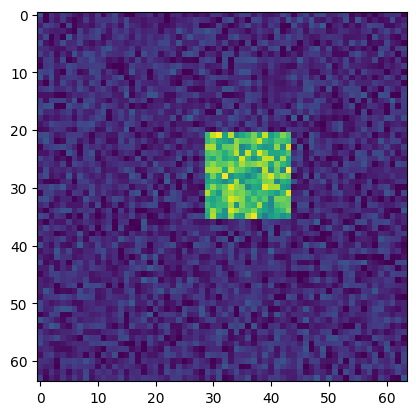

In [99]:
img, coord = dataset[2512]
print(f'{coord=}')
plt.imshow(img.numpy()[0])
img.numpy()

In [100]:
train_set, val_set, test_set = random_split(dataset, [0.7, 0.1, 0.2])
train_loader = DataLoader(dataset=train_set, batch_size=16, shuffle=True)
val_loader = DataLoader(dataset=val_set, batch_size=16, shuffle=False)
test_loader = DataLoader(dataset=test_set, batch_size=16, shuffle=False)

In [103]:
model = MyNN(64 * 64, 2).to(device)

input = torch.rand([16, 64 * 64], dtype=torch.float32).to(device)
out = model(input)
print(out.shape)

loss_model = nn.MSELoss()
opt = torch.optim.Adam(model.parameters(), lr=0.001)

torch.Size([16, 2])


In [106]:
train_loss, train_acc, val_loss, val_acc = [], [], [], []

In [107]:
EPOCHS = 5


# цикл обучения
for epoch in range(EPOCHS):

    # тренировка модели
    model.train()
    running_train_loss = []
    true_answer = 0 # для подсчёта правильных ответов
    train_loop = tqdm(train_loader, leave=False) # для когздания прогресс бара
    for x, targets in train_loop:
        # данные (batch_size, 1, 28, 28) -> (batch_size, 784)
        x = x.reshape(-1, 64 * 64).to(device)
        # (batch_size, int) -> (batch_size, 10), dtype=float32
        targets = targets.to(device) # делаем одномерный массив из нужных значений
        
        # прямой проход и расчет ошибки модели
        pred = model(x)
        loss = loss_model(pred, targets)

        # обратный проход
        opt.zero_grad() # обнуляем раннее вычесленный градиент
        loss.backward() # производится обратный проход в результате которого получаются новые градиенты 
        # шаг оптимизации
        opt.step() # корректировка весов

        running_train_loss.append(loss.item())
        mean_train_loss = sum(running_train_loss) / len(running_train_loss)

        true_answer += (torch.round(pred) == targets).all(dim=1).sum().item()
        
        train_loop.set_description(f'Epoch [{epoch+1}/{EPOCHS}], train_loss={mean_train_loss:.4f}')

    # расчёт значений метрики
    running_train_acc = true_answer / len(train_data)
    #сохранение значения функции потерь и метрики
    train_loss.append(mean_train_loss)
    train_acc.append(running_train_acc)

    # проверка модели - валидация
    model.eval()
    with torch.no_grad(): # запрещаем вычисление градиента
        running_val_loss = []
        true_answer = 0
        for x, targets in val_loader:
            # данные (batch_size, 1, 28, 28) -> (batch_size, 784)
            x = x.reshape(-1, 64 * 64).to(device)
            # (batch_size, int) -> (batch_size, 10), dtype=float32
            targets = targets.to(device)       


            # прямой проход и расчет ошибки модели
            pred = model(x)
            loss = loss_model(pred, targets)

            running_val_loss.append(loss.item())
            mean_val_loss = sum(running_val_loss) / len(running_val_loss)
            # val_loop.set_description(f'Epoch [{epoch+1}/{EPOCHS}], val_loss={mean_val_loss:.4f}')

            true_answer += (torch.round(pred) == targets).all(dim=1).sum().item()
        
        # расчёт значений метрики
        running_val_acc = true_answer / len(val_data)
        #сохранение значения функции потерь и метрики
        val_loss.append(mean_val_loss)
        val_acc.append(running_val_acc)

        print(f'Epoch [{epoch+1}/{EPOCHS}], train_loss={mean_train_loss:.4f}, train_acc={running_train_acc:.4f}, val_loss={mean_val_loss:.4f}, cal_acc={running_val_acc:.4f}')

KeyboardInterrupt: 

In [116]:
pred = torch.tensor([[25.1, 44.8], [52.3, 27.8], [12.7, 27.2]], dtype=torch.float32, requires_grad=True).to(device)
target =  torch.tensor([[25, 45], [53, 28], [13, 28]], dtype=torch.float32, requires_grad=True).to(device)
print(pred)
print()
print(target)

tensor([[25.1000, 44.8000],
        [52.3000, 27.8000],
        [12.7000, 27.2000]], device='cuda:0', grad_fn=<ToCopyBackward0>)

tensor([[25., 45.],
        [53., 28.],
        [13., 28.]], device='cuda:0', grad_fn=<ToCopyBackward0>)


In [117]:
torch.round(pred)

tensor([[25., 45.],
        [52., 28.],
        [13., 27.]], device='cuda:0', grad_fn=<RoundBackward0>)

In [118]:
torch.round(pred) == target

tensor([[ True,  True],
        [False,  True],
        [ True, False]], device='cuda:0')

In [119]:
(torch.round(pred) == target).all(dim=1)

tensor([ True, False, False], device='cuda:0')

In [120]:
(torch.round(pred) == target).all(dim=1).sum().item()

1

# Изменение скорости обучения

In [121]:
class MyModel(nn.Module):
    def __init__(self, input, output):
        super().__init__()
        self.layer1 = nn.Linear(input, 128)
        self.layer2 = nn.Linear(128, output)
        self.act = nn.ReLU()

    def forward(self, x):
        return self.model(x)

In [122]:
model = MyModel(784, 10)

loss_model = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(), lr=0.1)

## LambdaLR

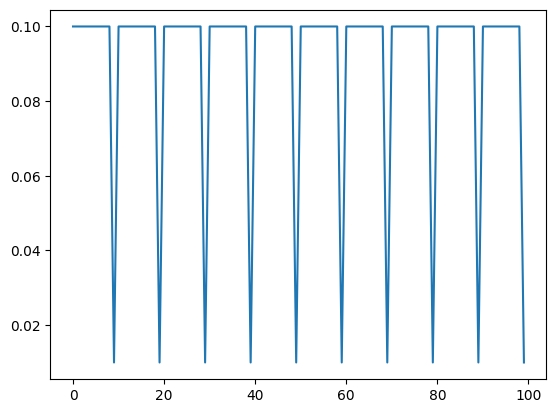

In [123]:
lr_lambda = lambda step: 0.1 if step % 10 == 0 else 1
lr_scheduler = torch.optim.lr_scheduler.LambdaLR(opt, lr_lambda=lr_lambda)

list_ = []

for epoch in range(100):

    # train
    for _ in range(1):
        # forward pass
        # backward pass
        opt.step()

    # validation
        #forward pass

    lr_scheduler.step()
    lr = lr_scheduler.get_last_lr()
    list_.append(lr)

plt.plot(list_)


## MultiStepLR

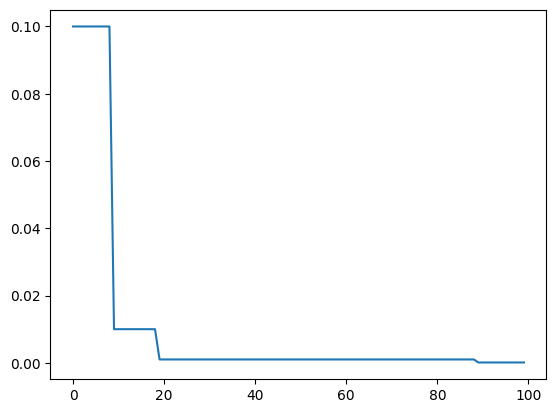

In [124]:
model = MyModel(784, 10)

loss_model = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(), lr=0.1)

lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(opt, milestones=[10, 20, 90], gamma=0.1)
# [итерации на которых меняется скорость обучения], gamma=сножитель скорости обучения

list_ = []

for epoch in range(100):

    # train
    for _ in range(1):
        # forward pass
        # backward pass
        opt.step()

    # validation
        #forward pass

    lr_scheduler.step()
    lr = lr_scheduler.get_last_lr()
    list_.append(lr)

plt.plot(list_)

## StepLR

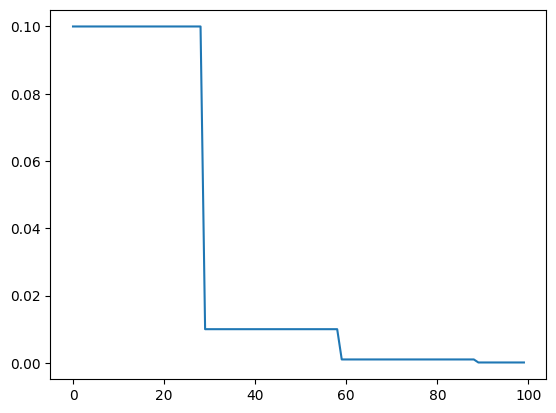

In [125]:
model = MyModel(784, 10)

loss_model = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(), lr=0.1)

lr_scheduler = torch.optim.lr_scheduler.StepLR(opt, step_size=30, gamma=0.1)
# step_size=каждый i-1 шаг, gamma=сножитель скорости обучения

list_ = []

for epoch in range(100):

    # train
    for _ in range(1):
        # forward pass
        # backward pass
        opt.step()

    # validation
        #forward pass

    lr_scheduler.step()
    lr = lr_scheduler.get_last_lr()
    list_.append(lr)

plt.plot(list_)

## ExponentialLR

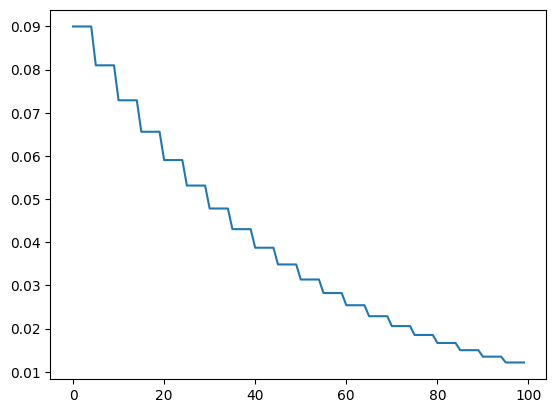

In [126]:
model = MyModel(784, 10)

loss_model = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(), lr=0.1)

lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(opt, gamma=0.9)


list_ = []

for epoch in range(100):

    # train
    for _ in range(1):
        # forward pass
        # backward pass
        opt.step()

    # validation
        #forward pass

    # lr_scheduler.step() # можно вызывать не на каждой эпохе
    if epoch % 5 == 0:
        lr_scheduler.step()
    lr = lr_scheduler.get_last_lr()
    list_.append(lr)

plt.plot(list_)

## ReducelLRonPlato

In [127]:
model = MyModel(784, 10)

loss_model = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(), lr=0.1)

# можно отслеживать изменение какой либо метрики
lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(opt, # оптимизатор
                                                          mode='min', # max/min- следит чтобы отслеживаемый параметр увеличивался уменьшался
                                                          factor=0.1, # коэф на который будет умножен lr
                                                          patience=8, # кол-во эпох без улучшения отслеживаемого параметра
                                                          threshold=0.0001, # порог на которой должен имениться отслеживаемый параметр
                                                          threshold_mode='rel', # rel / abs. rel -отслеживаемый параметр должен измениться на threshhold% иначе просто
                                                          cooldown=0, # кол-во перодов ожедания после уменьшения lr
                                                          min_lr=0, # минимальное значение скорости обучения
                                                          eps=1e-8 # минимальное изменение между новым и старым lr
                                                         )

In [128]:
loss = torch.full([5, 10],0.1)
# print(loss)
# print()
loss = loss * torch.tensor([1 / i for i in range(1, 6)]).reshape([5, 1])
# print(loss)
# print()
loss = loss.reshape([50])
# print(loss)

In [129]:
list_ = []

for epoch in range(50):

    # train
    for _ in range(1):
        # forward pass
        # backward pass
        opt.step()

    # validation
        #forward pass

    # lr_scheduler.step() # можно вызывать не на каждой эпохе
    lr_scheduler.step(loss[epoch])
    lr = lr_scheduler._last_lr[0]
    list_.append(lr)


Text(39, 0.076, 'thrashold_mode="rel"')

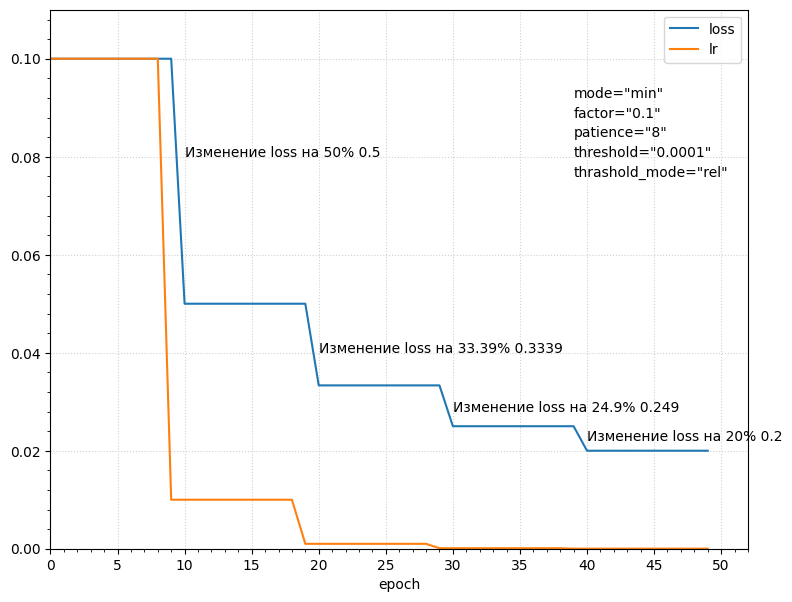

In [140]:
fig, ax = plt.subplots(figsize=(9, 7))

ax.plot(loss)
ax.plot(list_)

ax.set_xlim(0, 52)
ax.set_ylim(0, 0.11)

ax.xaxis.set_major_locator(MultipleLocator(5))

ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

ax.grid(which='major', color='#CCCCCC', linestyle='--', alpha=0.9)
ax.grid(which='major', color='#CCCCCC', linestyle=':', alpha=0.9)

ax.legend(['loss', 'lr']) # lr - learning rate - скорость обучения
ax.set_xlabel('epoch')

if lr_scheduler.threshold_mode == 'abs':
    ax.text(10, 0.08, 'Изменение loss на 0.5')
    ax.text(20, 0.04, 'Изменение loss на 0.0167')
    ax.text(30, 0.028, 'Изменение loss на 0.008')
    ax.text(40, 0.02, 'Изменение loss на 0.005')
else:
    ax.text(10, 0.08, 'Изменение loss на 50% 0.5')
    ax.text(20, 0.04, 'Изменение loss на 33.39% 0.3339')
    ax.text(30, 0.028, 'Изменение loss на 24.9% 0.249')
    ax.text(40, 0.022, 'Изменение loss на 20% 0.2')

ax.text(39, 0.092, f'mode="{lr_scheduler.mode}"')
ax.text(39, 0.088, f'factor="{lr_scheduler.factor}"')
ax.text(39, 0.084, f'patience="{lr_scheduler.patience}"')
ax.text(39, 0.080, f'threshold="{lr_scheduler.threshold}"')
ax.text(39, 0.076, f'thrashold_mode="{lr_scheduler.threshold_mode}"')


In [ ]:
%%time

EPOCHS = 5


# цикл обучения
for epoch in range(EPOCHS):

    # тренировка модели
    model.train()
    running_train_loss = []
    true_answer = 0 # для подсчёта правильных ответов
    train_loop = tqdm(train_loader, leave=False) # для когздания прогресс бара
    for x, targets in train_loop:
        # данные (batch_size, 1, 28, 28) -> (batch_size, 784)
        x = x.reshape(-1, 64 * 64).to(device)
        # (batch_size, int) -> (batch_size, 10), dtype=float32
        targets = targets.to(device) # делаем одномерный массив из нужных значений
        
        # прямой проход и расчет ошибки модели
        pred = model(x)
        loss = loss_model(pred, targets)

        # обратный проход
        opt.zero_grad() # обнуляем раннее вычесленный градиент
        loss.backward() # производится обратный проход в результате которого получаются новые градиенты 
        # шаг оптимизации
        opt.step() # корректировка весов

        running_train_loss.append(loss.item())
        mean_train_loss = sum(running_train_loss) / len(running_train_loss)

        true_answer += (torch.round(pred) == targets).all(dim=1).sum().item()
        
        train_loop.set_description(f'Epoch [{epoch+1}/{EPOCHS}], train_loss={mean_train_loss:.4f}')

    # расчёт значений метрики
    running_train_acc = true_answer / len(train_data)
    #сохранение значения функции потерь и метрики
    train_loss.append(mean_train_loss)
    train_acc.append(running_train_acc)

    # проверка модели - валидация
    model.eval()
    with torch.no_grad(): # запрещаем вычисление градиента
        running_val_loss = []
        true_answer = 0
        for x, targets in val_loader:
            # данные (batch_size, 1, 28, 28) -> (batch_size, 784)
            x = x.reshape(-1, 64 * 64).to(device)
            # (batch_size, int) -> (batch_size, 10), dtype=float32
            targets = targets.to(device)       


            # прямой проход и расчет ошибки модели
            pred = model(x)
            loss = loss_model(pred, targets)

            running_val_loss.append(loss.item())
            mean_val_loss = sum(running_val_loss) / len(running_val_loss)
            # val_loop.set_description(f'Epoch [{epoch+1}/{EPOCHS}], val_loss={mean_val_loss:.4f}')

            true_answer += (torch.round(pred) == targets).all(dim=1).sum().item()
        
        # расчёт значений метрики
        running_val_acc = true_answer / len(val_data)
        #сохранение значения функции потерь и метрики
        val_loss.append(mean_val_loss)
        val_acc.append(running_val_acc)

        lr_scheduler.step(mean_val_loss)
        lr_list.append(lr_scheduler._last_lr[0])

        print(f'Epoch [{epoch+1}/{EPOCHS}], train_loss={mean_train_loss:.4f}, train_acc={running_train_acc:.4f}, val_loss={mean_val_loss:.4f}, val_acc={running_val_acc:.4f}')

Epoch [1/5], train_loss=9.6934:  17%|████████                                       | 748/4375 [00:30<02:24, 25.11it/s]

Без шедулера
Epoch [5/5], train_loss=0.0943, train_acc=1.3529, val_loss=0.1277, cal_acc=0.4010
CPU times: total: 12min 50s
Wall time: 13min 5

Epoch [5/5], train_loss=0.0595, train_acc=1.5332, val_loss=0.0816, val_acc=0.4692
CPU times: total: 13min 40s
Wall time: 13min 53s6s

In [26]:
train_loss_reg, train_acc_reg, val_loss_reg, val_acc_reg = train_loss.copy(), train_acc.copy(), val_loss.copy(), val_acc.copy()

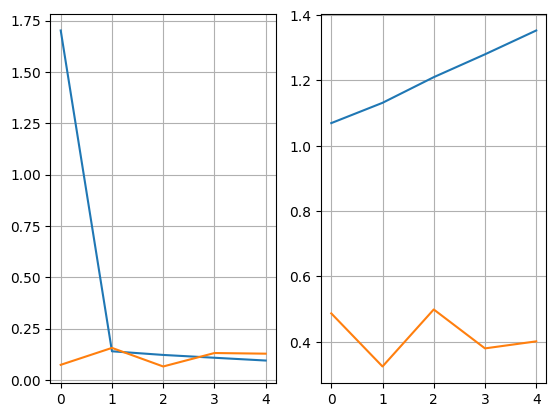

In [27]:
fig, axs = plt.subplots(1, 2)
axs[0].plot(train_loss)
axs[0].plot(val_loss)
axs[0].grid()
axs[1].plot(train_acc)
axs[1].plot(val_acc)
# axs[0].legend('loss_train', 'loss_val')
# axs[1].legend('acc_train', 'acc_val')
axs[1].grid()

# Сохранение модели
См обучение модели

# Остановки модели

In [ ]:
%%time
# цикл обучения
for epoch in range(EPOCHS):

    # тренировка модели
    model.train()
    running_train_loss = []
    true_answer = 0 # для подсчёта правильных ответов
    train_loop = tqdm(train_loader, leave=False) # для когздания прогресс бара
    for x, targets in train_loop:
        # данные (batch_size, 1, 28, 28) -> (batch_size, 784)
        x = x.reshape(-1, 28 * 28).to(device)
        # (batch_size, int) -> (batch_size, 10), dtype=float32
        targets = targets.reshape(-1).to(torch.int32) # делаем одномерный массив из нужных значений
        targets = torch.eye(10)[targets].to(device) # из единичной матрицы 10*10 выдергиваем необходимые строки в соответствии с таргет

        # прямой проход и расчет ошибки модели
        pred = model(x)
        loss = loss_model(pred, targets)

        # обратный проход
        opt.zero_grad() # обнуляем раннее вычесленный градиент
        loss.backward() # производится обратный проход в результате которого получаются новые градиенты 
        # шаг оптимизации
        opt.step() # корректировка весов

        running_train_loss.append(loss.item())
        mean_train_loss = sum(running_train_loss) / len(running_train_loss)

        true_answer += (pred.argmax(dim=1) == targets.argmax(dim=1)).sum().item()
        
        train_loop.set_description(f'Epoch [{epoch+1}/{EPOCHS}], train_loss={mean_train_loss:.4f}')

    # расчёт значений метрики
    print(len(train_acc))
    running_train_acc = true_answer / len(train_data)
    #сохранение значения функции потерь и метрики
    train_loss.append(mean_train_loss)
    train_acc.append(running_train_acc)

    # проверка модели - валидация
    model.eval()
    with torch.no_grad(): # запрещаем вычисление градиента
        running_val_loss = []
        true_answer = 0
        for x, targets in val_loader:
            # данные (batch_size, 1, 28, 28) -> (batch_size, 784)
            x = x.reshape(-1, 28 * 28).to(device)
            # (batch_size, int) -> (batch_size, 10), dtype=float32
            targets = targets.reshape(-1).to(torch.int32)
            targets = torch.eye(10)[targets].to(device)        


            # прямой проход и расчет ошибки модели
            pred = model(x)
            loss = loss_model(pred, targets)

            running_val_loss.append(loss.item())
            mean_val_loss = sum(running_val_loss) / len(running_val_loss)
            # val_loop.set_description(f'Epoch [{epoch+1}/{EPOCHS}], val_loss={mean_val_loss:.4f}')

            true_answer += (pred.argmax(dim=1) == targets.argmax(dim=1)).sum().item()
        
        # расчёт значений метрики
        running_val_acc = true_answer / len(val_data)
        #сохранение значения функции потерь и метрики
        val_loss.append(mean_val_loss)
        val_acc.append(running_val_acc)

        lr_scheduler.step(mean_val_loss)
        lr_list.append(lr_scheduler._last_lr[0])

        print(f'Epoch [{epoch+1}/{EPOCHS}], train_loss={mean_train_loss:.4f}, train_acc={running_train_acc:.4f}, val_loss={mean_val_loss:.4f}, val_acc={running_val_acc:.4f}')

        if best_loss is None:
            best_loss = mean_val_loss

        if mean_val_loss < best_loss - best_loss * treshold:
            count = 0
            best_loss = mean_val_loss
            # torch.save(model.state_dict(), f'model_mnist/model_state_dict_epoch_{epoch}_mnist.pt')
            checkpoint = {
                        'class_to_idx': train_data.class_to_idx,
                        'info': std_info,
                        'state_model': model.state_dict(),
                        'state_opt': opt.state_dict(),
                        'state_lr_scheduler': lr_scheduler.state_dict(),
                        'loss': {
                            'train_loss': train_loss,
                            'val_loss': val_loss,
                            'best_loss': best_loss
                        },
                        'metric': {
                            'train_acc': train_acc,
                            'val_acc': val_acc
                        },
                        'lr': lr_list,
                        'epoch': {
                            'EPOCHS': EPOCHS,
                            'save_epoch': epoch
                        }
                    }
            torch.save(checkpoint, f'model_mnist/model_state_mnist_{epoch}_checkpoint.pt')
            for i in os.listdir('model_mnist'):
                if i == f'model_state_dict_epoch_{epoch}_mnist.pt' or i == f'model_mnist/model_state_mnist_{epoch}__checkpoint.pt':
                    continue
                os.remove(i)
            print(f'На эпохе {epoch+1}, сохранена модель со значением функции потерь на валидации - {mean_val_loss:.4f}', end='\n\n')

        if count >= 10:
            print(f"\033[31mОбучение остановленно на {epoch + 1} эпохе.\033[0m")
            break
        count += 1

# VGG своими лапками

In [1]:
import torch
import torch.nn as nn

## В лоб

In [5]:
class VGG11(nn.Module):

    def __init__(self, num_classes=1000, dropout=0.5):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, (3, 3), padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, (3, 3), padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(2),
            nn.Conv2d(128, 256, (3, 3), padding=1),
            nn.ReLU(True),
            nn.Conv2d(256, 256, (3, 3), padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(2),
            nn.Conv2d(256, 512, (3, 3), padding=1),
            nn.ReLU(True),
            nn.Conv2d(512, 512, (3, 3), padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(2),
            nn.Conv2d(512, 512, (3, 3), padding=1),
            nn.ReLU(True),
            nn.Conv2d(512, 512, (3, 3), padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(2),
        )
        self.flatten = nn.Flatten()
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(),
            nn.Dropout(p=dropout),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Dropout(p=dropout),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.flatten(x)
        out = self.classifier(x)
        return out

In [6]:
model = VGG11()
inp = torch.rand([1, 3, 224, 224], dtype=torch.float32)
pred = model(inp)
print(pred.shape)

torch.Size([1, 1000])


## Общий класс VGG

In [ ]:
cfgs = {
    'cgg_11': [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'cgg_13': [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'cgg_16': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M', 512, 512, 512, 'M'],
    'cgg_19': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 512, 512, 512, 512, 'M'],
}

In [20]:
class VGG(nn.Module):
    _cfgs = {
    'vgg_11': [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'vgg_13': [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'vgg_16': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M', 512, 512, 512, 'M'],
    'vgg_19': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 512, 512, 512, 512, 'M'],
    }
    def __init__(self, name, num_classes=1000, dropout=0.5):
        super().__init__()
        self.cfg = self._cfgs[name]

        self.features = self.make_layers(self.cfg)
        self.flatten = nn.Flatten()
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(),
            nn.Dropout(p=dropout),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Dropout(p=dropout),
            nn.Linear(4096, num_classes)
        )


    def forward(self, x):
        x = self.features(x)
        x = self.flatten(x)
        out = self.classifier(x)
        return out

    def make_layers(self, cfg):    
        layers = []
        in_channels = 3
        for value in cfg:
            if value == 'M':
                layers += [nn.MaxPool2d(2)]
            else:
                conv2d = nn.Conv2d(in_channels, value, (3, 3), padding=1)
                layers += [conv2d, nn.ReLU(True)]
                in_channels = value
        return nn.Sequential(*layers)

In [21]:
model = VGG('vgg_13')
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (16): 

In [22]:
inp = torch.rand([1, 3, 224, 224], dtype=torch.float32)
pred = model(inp)
print(pred.shape)

torch.Size([1, 1000])


## Готовое решение из коробки

In [23]:
import torchvision
from torchvision import models
import torchvision.transforms as v1
from torchvision.transforms import v2
import matplotlib.pyplot as plt
from PIL import Image


C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [25]:
vgg = models.vgg11(weights='DEFAULT')
# pretrain=True - обученные веса - устаревший метод загрузки
# weights='DEFAULT' - загрузить обученные веса
# weights='ШОТОКАГОТО' - загрузить конкретную версию весов

Downloading: "https://download.pytorch.org/models/vgg13-19584684.pth" to C:\Users\user/.cache\torch\hub\checkpoints\vgg13-19584684.pth
100%|███████████████████████████████████████████████████████████████████████████████| 508M/508M [00:48<00:00, 11.0MB/s]


In [50]:
# просто загрузка весов
weights_wgg11 = models.VGG11_Weights.DEFAULT
# а теперь запихиваем загруженные веса
vgg11 = models.vgg11(weights=weights_wgg11)

## Аттрибуты

In [35]:
print(f'{weights_wgg11.url}\n\n{weights_wgg11.transforms}')

https://download.pytorch.org/models/vgg11-8a719046.pth

functools.partial(<class 'torchvision.transforms._presets.ImageClassification'>, crop_size=224)


In [36]:
weights_wgg11.meta['categories']

['tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen',
 'ostrich',
 'brambling',
 'goldfinch',
 'house finch',
 'junco',
 'indigo bunting',
 'robin',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel',
 'kite',
 'bald eagle',
 'vulture',
 'great grey owl',
 'European fire salamander',
 'common newt',
 'eft',
 'spotted salamander',
 'axolotl',
 'bullfrog',
 'tree frog',
 'tailed frog',
 'loggerhead',
 'leatherback turtle',
 'mud turtle',
 'terrapin',
 'box turtle',
 'banded gecko',
 'common iguana',
 'American chameleon',
 'whiptail',
 'agama',
 'frilled lizard',
 'alligator lizard',
 'Gila monster',
 'green lizard',
 'African chameleon',
 'Komodo dragon',
 'African crocodile',
 'American alligator',
 'triceratops',
 'thunder snake',
 'ringneck snake',
 'hognose snake',
 'green snake',
 'king snake',
 'garter snake',
 'water snake',
 'vine snake',
 'night snake',
 'boa constrictor',
 'rock python',
 'Indian cobr

## Загружаем изображение

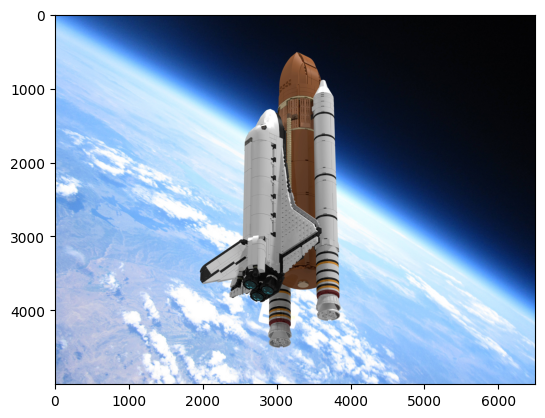

In [64]:
img = Image.open(r'C:\Users\user\Desktop\shuttle.jpg')
plt.imshow(img)

In [65]:
# загружаем
transforms_default = weights_wgg11.transforms()
trans

Compose(
      ToImage()
      Resize(size=[256], interpolation=InterpolationMode.BILINEAR, antialias=True)
      CenterCrop(size=(224, 224))
)

In [66]:
size = 224
transforms_v1 = v1.Compose([
    v1.Resize(256),
    v1.CenterCrop(size),
    v1.ToTensor(),
    v1.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [77]:
# делаем свое

size = 224
transforms_v2 = v2.Compose([
    v2.ToImage(),
    v2.Resize(256),
    v2.CenterCrop(size),
    v2.ToDtype(dtype=torch.float32, scale=True),

])


In [74]:
class_names = weights_wgg11.meta['categories']

In [75]:
%matplotlib inline

default
    space shuttle -> 0.99826
    missile -> 0.00138
    projectile -> 0.00034
    wing -> 0.00001
    mosque -> 0.00000
    airliner -> 0.00000
--------------------

v1
    space shuttle -> 0.99826
    missile -> 0.00138
    projectile -> 0.00034
    wing -> 0.00001
    mosque -> 0.00000
    airliner -> 0.00000
--------------------

v2
    space shuttle -> 0.97632
    missile -> 0.01772
    projectile -> 0.00305
    mosque -> 0.00120
    stupa -> 0.00091
    airship -> 0.00016
--------------------



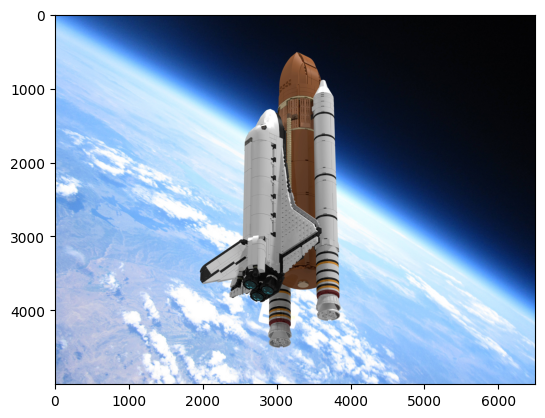

In [78]:
transforms = {
    'default': transforms_default,
    'v1': transforms_v1,
    'v2': transforms_v2
}
vgg11.eval()
plt.imshow(img)

for name, transform in transforms.items():
    print(f'{name}')
    img_in = transform(img).unsqueeze(dim=0) # img - (3, 224, 224) - unsqueeze - (1, 3, 224, 224) - img_in
    # добавили новую ось
    pred = vgg11(img_in).squeeze() # удаляются оси где 1 элемен (1, 1000) - (1000)

    sor, indices = pred.softmax(dim=0).sort(descending=True) # сортировка по убыванию
    for i, (s, ind) in enumerate(zip(sor, indices)):
        print(f'    {class_names[ind]} -> {s:.5f}')
        if i//5:
            break
    print('--------------------', end='\n\n')


# ResNet своими лапками

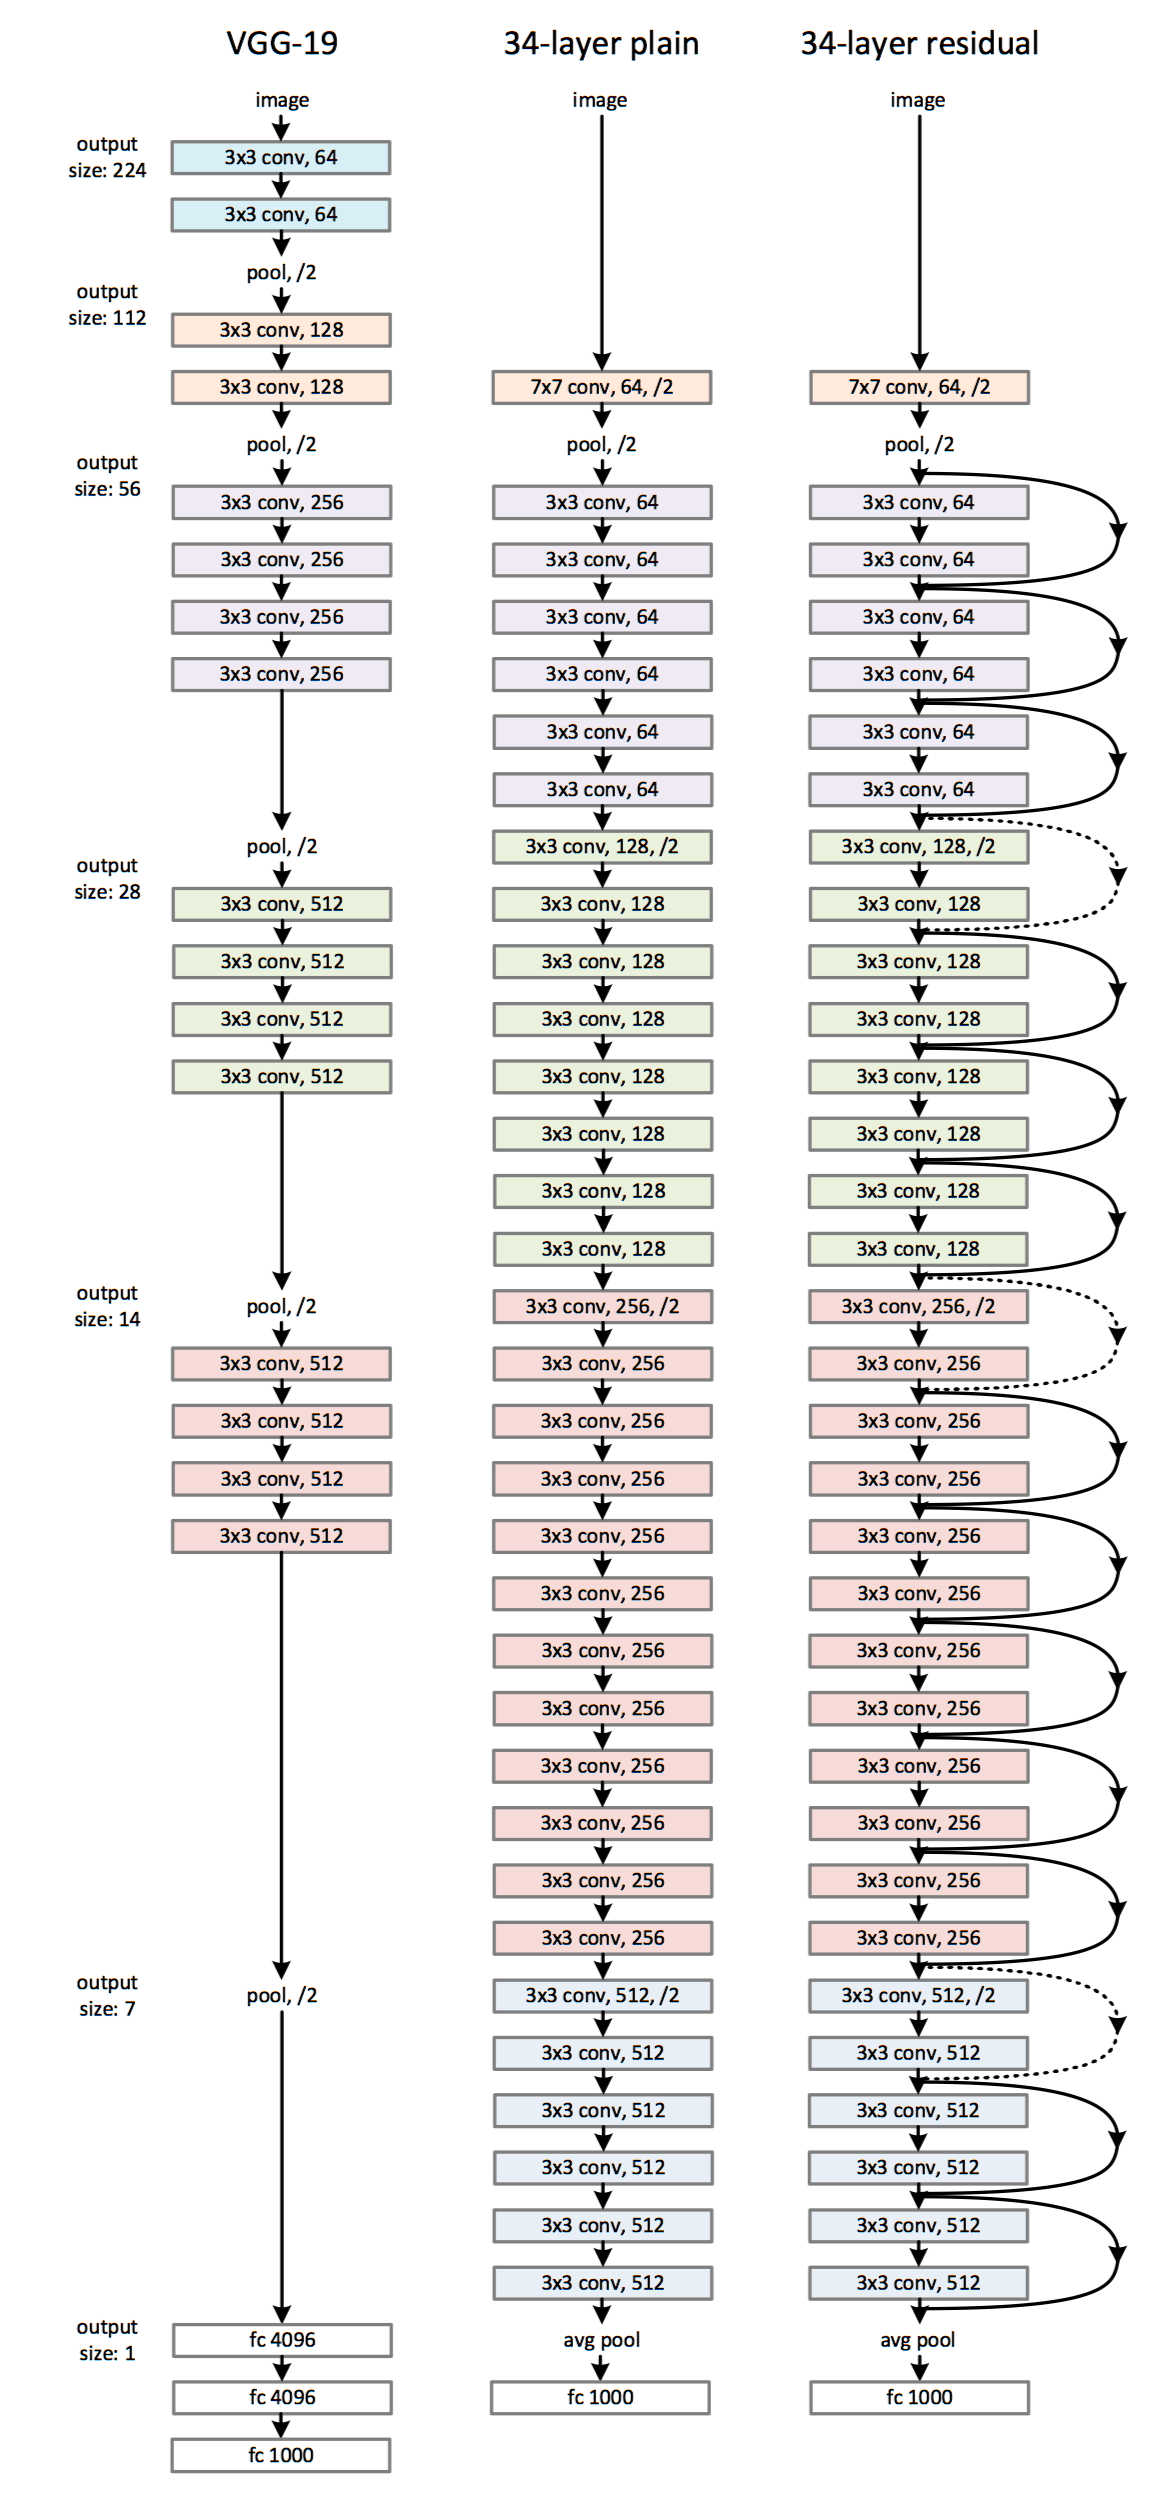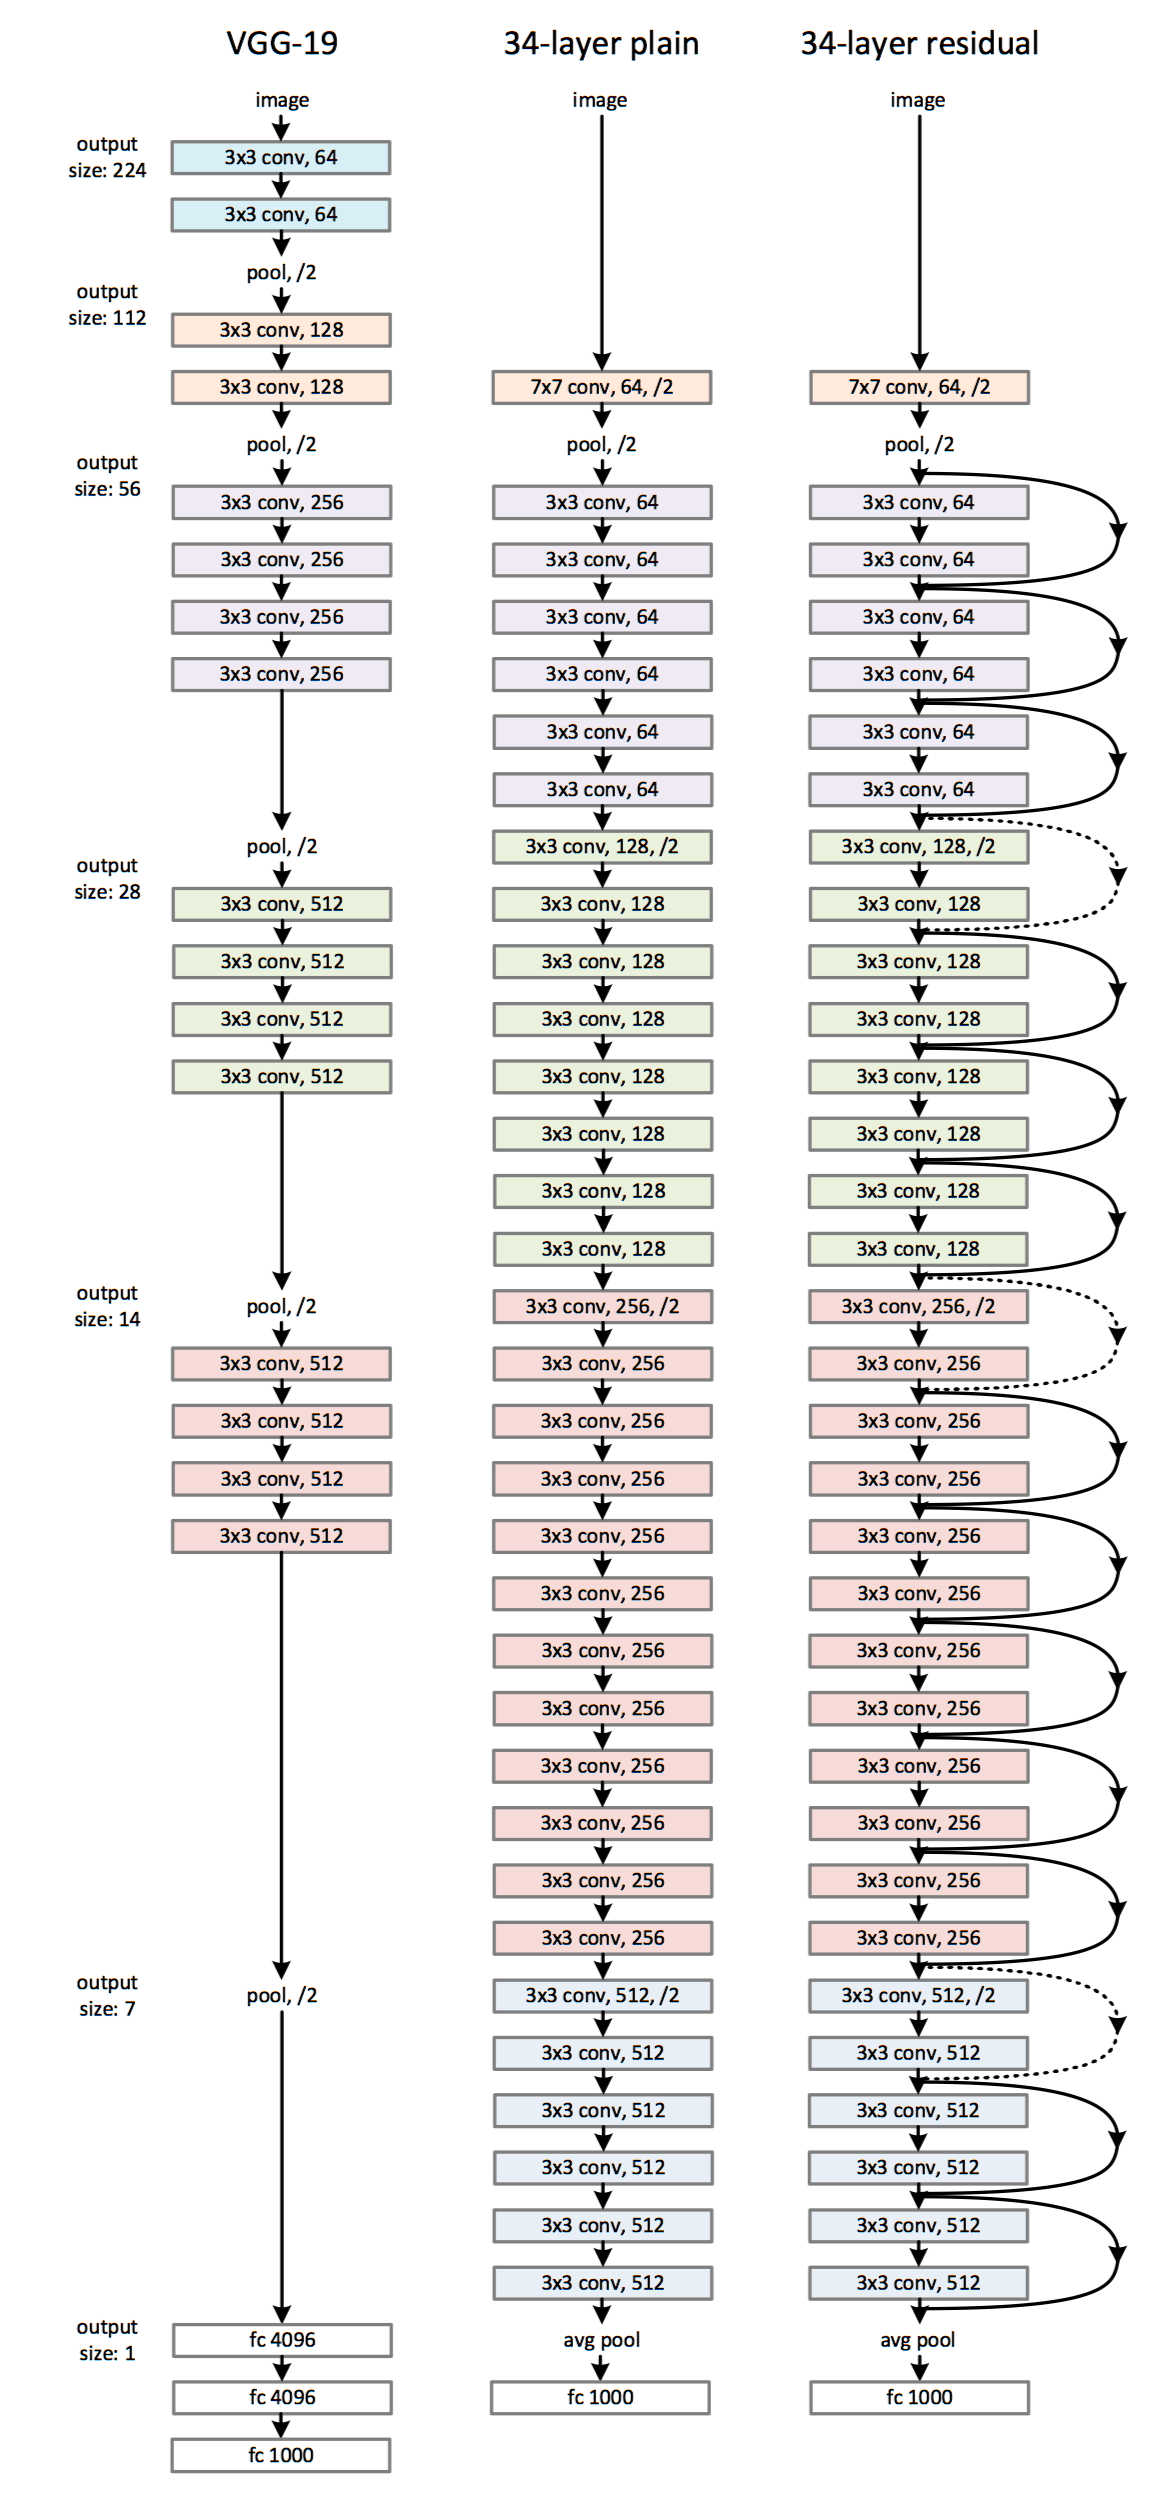

In [79]:
import torch
import torch.nn as nn

In [ ]:
def conv3x3(in_channels, out_channels, stride=1):
    return nn.Conv2d(in_channelsm, out_channels, kernel_size=(3, 3), stride=stride, padding=1, bias=False)

def conv1x1(in_channels, out_channels, stride=1):
    return nn.Conv2d(in_channelsm, out_channels, kernel_size=(1, 1), stride=stride, bias=False)


In [ ]:
class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super().__init__()
        self.conv1 = conv3x3(in_channels, out_channels, stride)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(in_channels, out_channels)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample

    
    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)
        return out
        

In [ ]:
class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super().__init__()
        self.conv1 = conv3x3(in_channels, out_channels, stride)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = conv3x3(in_channels, out_channels)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.conv3 = conv3x3(in_channels, out_channels*self.expansion)
        self.bn3 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample

    
    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        
        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)
        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)
        return out
        

In [ ]:
class ResNet(nn.Module):
    cfgs = {
        'resnet18': (BasicBlock, [2, 2, 2, 2]),
        'resnet34': (BasicBlock, [3, 4, 6, 3]),
        'resnet50': (Bottleneck, [3, 4, 6, 3]),
        'resnet101': (Bottleneck, [3, 4, 23, 3]),
        'resnet152': (Bottleneck, [3, 8, 36, 3]),
    }


    def __init(self, name, num_classes=1000):
        super().__init__()
        block, layers = self.cfgs(name)

        self.inplace = 64
        self.conv1 = nn.Conv2d(3, self.inplanes, (7, 7), stride=2, padding=3, bias=False)